### IDs:
Insert yours IDs to the cell below

ID #1: 066466061

ID #2:


### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

In [1]:
from scipy import  stats 
import seaborn as sns
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import sem, t
from scipy import mean
from scipy.stats import norm
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import time
import pandas as pd


#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

#### dataset  values x=i and y=i*2 for i=1.. 49 
#### and one value x = 50 * 100 and y = -50 * 100 * 2 

In [108]:

pairs = [(i, i * 2) if i < 50 else (i*100, -i*100*2) for i  in range(1, 51)]
df = pd.DataFrame(pairs, columns=['x', 'y'])
df.sample(5)

,x,y
41,42,84
4,5,10
38,39,78
26,27,54
34,35,70


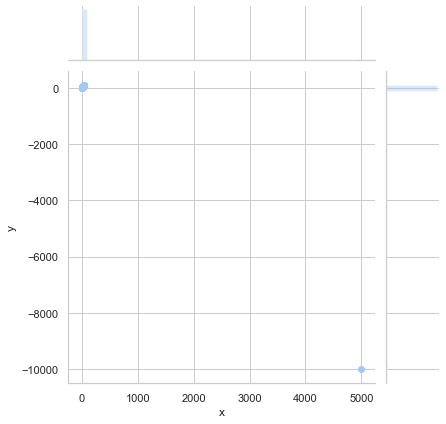

In [109]:
sns.jointplot('x', 'y', df)

In [72]:
X = [p[0] for p in pairs]
Y = [p[1] for p in pairs]
stats.pearsonr(X, Y)[0], stats.pearsonr(X[0:-1], Y[0:-1])[0]

(-0.9992002799185162, 1.0)

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

In [73]:
#### 1-49 first elements: i, i * 2 
#### last elemet: 50 * 100, -50 * 200

In [110]:
pairs = [(i, i * 2) if i < 50 else (i*100, -i*100*2) for i  in range(1, 51)]
df = pd.DataFrame(pairs, columns=['x', 'y'])
df.sample(3)

,x,y
8,9,18
24,25,50
15,16,32


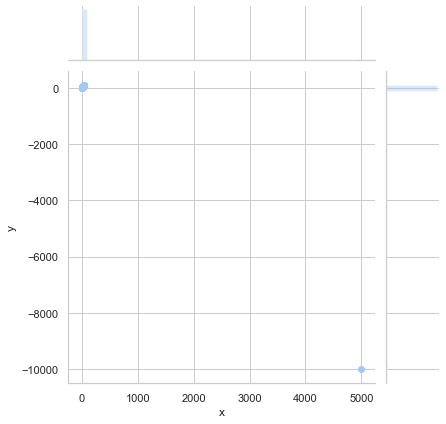

In [111]:
sns.jointplot('x', 'y', df)


In [75]:
X = [p[0] for p in pairs]
Y = [p[1] for p in pairs]

p_res = stats.pearsonr(X, Y)[0]
kendel_res = stats.kendalltau(X, Y)[0]

'kendel {} pearson {} kendel > pearson + 0.45 ? {}'.format(kendel_res, p_res, kendel_res > p_res + 0.45)

'kendel 0.92 pearson -0.9992002799185162 kendel > pearson + 0.45 ? True'

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

In [77]:
# 1/3 from the elements are i, i * 100
#2/3 are i, -i/2 

In [113]:
pairs = [(i, i * 1000) if i %3 == 0  else (i, -i/2) for i  in range(1, 51)]
df = pd.DataFrame(pairs, columns=['x', 'y'])
df.sample(5)

,x,y
19,20,-10.0
24,25,-12.5
10,11,-5.5
22,23,-11.5
27,28,-14.0


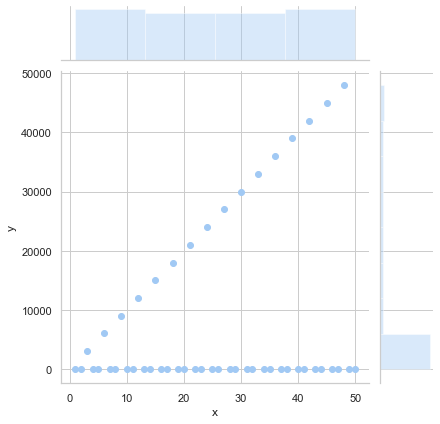

In [114]:
sns.jointplot('x', 'y', df)

In [80]:
X = [p[0] for p in pairs]
Y = [p[1] for p in pairs]

p_res = stats.pearsonr(X, Y)[0]
kendel_res = stats.kendalltau(X, Y)[0]
p_res, kendel_res, kendel_res < p_res - 0.45

(0.29741602432223946, -0.36, True)

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

In [82]:
#first 49 elements i, i * 2
#the 50 element i * 100, -i * 200

In [115]:
pairs = [(i, i * 2) if i < 50 else (i*100, -i*100*2) for i  in range(1, 51)]
df = pd.DataFrame(pairs, columns=['x', 'y'])
df.sample(3)

,x,y
2,3,6
40,41,82
49,5000,-10000


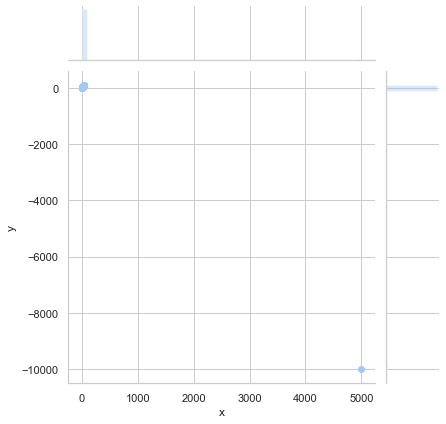

In [116]:
sns.jointplot('x', 'y', df)

In [84]:


X = [p[0] for p in pairs]
Y = [p[1] for p in pairs]

pearson = stats.pearsonr(X, Y)[0]
speaemman = stats.spearmanr(X, Y)[0]

pearson, speaemman, pearson < speaemman - 0.6

(-0.9992002799185162, 0.8823529411764706, True)

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

#### 48 values i, -1 (i=1 to 47) and values i * 100, i * 100 for i=48 to 50.

In [117]:
pairs = [(i, -i ) if i < 48 else (i*100, i * 100) for i  in range(1, 51)]
df = pd.DataFrame(pairs, columns=['x', 'y'])
df.sample(4)

,x,y
44,45,-45
21,22,-22
43,44,-44
15,16,-16


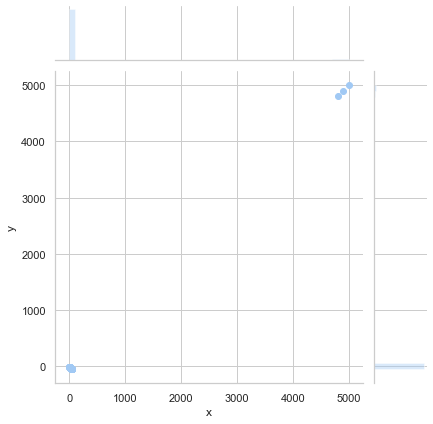

In [118]:
sns.jointplot('x', 'y', df)

In [91]:
X = [p[0] for p in pairs]
Y = [p[1] for p in pairs]

pearson = stats.pearsonr(X, Y)[0]
speaemman = stats.spearmanr(X, Y)[0]

pearson, speaemman, pearson > speaemman + 1.2

(0.9997446325162558, -0.661080432172869, True)

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

#### impossible, max diffrence between Kendall and Spearman is 0.5

####  Kendal and Spearman are ranked base correlations. 
#### Assuome that τ(x,y) < ρ(x,y) – 1.2 is True then τ(x,y) < 0 and ρ(x,y) > 0 cotradict with the fact that both of them 
#### are based on ranking and measure the monotonicity of the values. 


### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


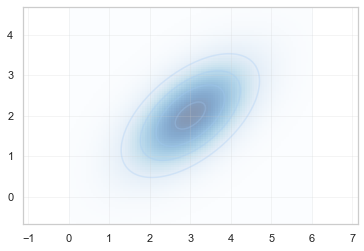

In [92]:

from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [9]:

df = pd.read_csv('heart.csv', sep='\t')
df = df.where(pd.notnull(df), None)
NUMERICAL_FEATURES = ['age', 'trestbps', 'chol', 'thalach', 'slope', 'oldpeak', 'ca']


In [10]:
for col in NUMERICAL_FEATURES:
    data = df[df[col].notnull()][col]
    median_val = np.median(data)
    df[col] = df[col].apply(lambda v: v if v is not None else median_val)

In [11]:
def calc_confidence_range(df, col, target_val, confidence):
    vals = df[(df['target'] == target_val) & (df[col].notnull())][col].tolist()

    n = len(vals)

    m = mean(vals)
    std_err = sem(vals)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)

    start = m - h
    end = m + h

    return m, start, end
    
def is_mean_confidenct(df, col, confidence):
    healty_mean, healty_start, healty_end = calc_confidence_range(df, col, 1, confidence)
    unhealthy_mean, unhealthy_start, unhealthy_end = calc_confidence_range(df, col, 0, confidence)
    
    return healty_end <  unhealthy_start or unhealthy_end < healty_start, healty_mean, unhealthy_mean
   

for col in NUMERICAL_FEATURES:
    col_is_mean_confident, healty_mean, unhealthy_mean = is_mean_confidenct(df, col, 0.95)
    est = 'smaller/greater'
    if col_is_mean_confident:
        if healty_mean >unhealthy_mean:
            est ='greater'
        else:
            est = 'smaller'
            
    print('Col {} healthy mean {} is {}95% confidence {} from unhealthy mean {}'\
          .format(col.upper(), healty_mean, '' if col_is_mean_confident  else 'Not ', est, unhealthy_mean))

Col AGE healthy mean 52.515151515151516 is 95% confidence smaller from unhealthy mean 56.666666666666664
Col TRESTBPS healthy mean 129.3151515151515 is Not 95% confidence smaller/greater from unhealthy mean 134.3985507246377
Col CHOL healthy mean 241.8969696969697 is Not 95% confidence smaller/greater from unhealthy mean 250.57246376811594
Col THALACH healthy mean 158.42424242424244 is 95% confidence greater from unhealthy mean 139.07246376811594
Col SLOPE healthy mean 1.593939393939394 is 95% confidence greater from unhealthy mean 1.1666666666666667
Col OLDPEAK healthy mean 0.589090909090909 is 95% confidence smaller from unhealthy mean 1.5717391304347825
Col CA healthy mean 0.36363636363636365 is 95% confidence smaller from unhealthy mean 1.1666666666666667


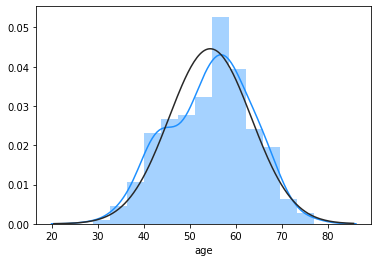

In [12]:

    
def plot_hist_and_mle(data, x_label):
    sns.distplot(data, fit= norm , color="dodgerblue", axlabel=x_label)

data = df[df['age'].notnull()]['age']
plot_hist_and_mle(data.tolist(), "age")

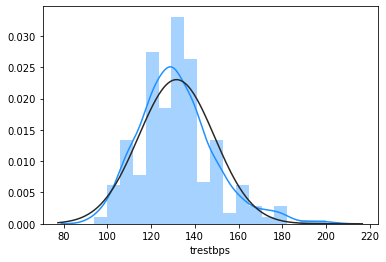

In [13]:
#['age', 'trestbps', 'chol', 'thalach']
data = df[df['trestbps'].notnull()]['trestbps']
plot_hist_and_mle(data.tolist(), "trestbps")

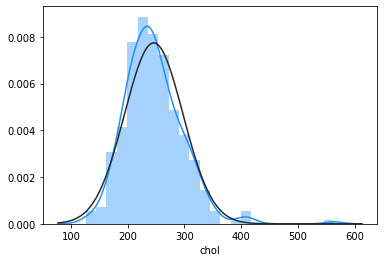

In [14]:
data = df[df['chol'].notnull()]['chol']
plot_hist_and_mle(data.tolist(), "chol")

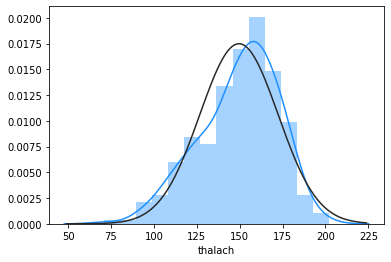

In [15]:
data = df[df['thalach'].notnull()]['thalach']
plot_hist_and_mle(data.tolist(), "thalach")

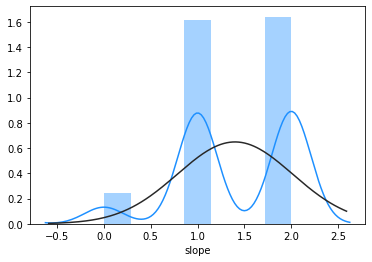

In [16]:

data = df[df['slope'].notnull()]['slope']
plot_hist_and_mle(data.tolist(), "slope")

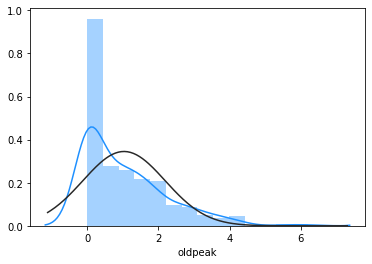

In [17]:
data = df[df['oldpeak'].notnull()]['oldpeak']
plot_hist_and_mle(data.tolist(), "oldpeak")

In [18]:
df[NUMERICAL_FEATURES].corr('spearman')

,age,trestbps,chol,thalach,slope,oldpeak,ca
age,1.000000,0.260596,0.188586,-0.403971,-0.190496,0.282640,0.336633
trestbps,0.260596,1.000000,0.121264,-0.030046,-0.088702,0.149716,0.078735
chol,0.188586,0.121264,1.000000,-0.056728,-0.015767,0.056353,0.108243
thalach,-0.403971,-0.030046,-0.056728,1.000000,0.431239,-0.418918,-0.251476
slope,-0.190496,-0.088702,-0.015767,0.431239,1.000000,-0.588793,-0.099901
oldpeak,0.282640,0.149716,0.056353,-0.418918,-0.588793,1.000000,0.220476
ca,0.336633,0.078735,0.108243,-0.251476,-0.099901,0.220476,1.000000


In [19]:
df[NUMERICAL_FEATURES].corr('kendall')

,age,trestbps,chol,thalach,slope,oldpeak,ca
age,1.000000,0.183812,0.130190,-0.283679,-0.153040,0.204754,0.270808
trestbps,0.183812,1.000000,0.082364,-0.021216,-0.072109,0.106468,0.061317
chol,0.130190,0.082364,1.000000,-0.038180,-0.012582,0.043335,0.085977
thalach,-0.283679,-0.021216,-0.038180,1.000000,0.345268,-0.296272,-0.193739
slope,-0.153040,-0.072109,-0.012582,0.345268,1.000000,-0.503602,-0.092013
oldpeak,0.204754,0.106468,0.043335,-0.296272,-0.503602,1.000000,0.179695
ca,0.270808,0.061317,0.085977,-0.193739,-0.092013,0.179695,1.000000


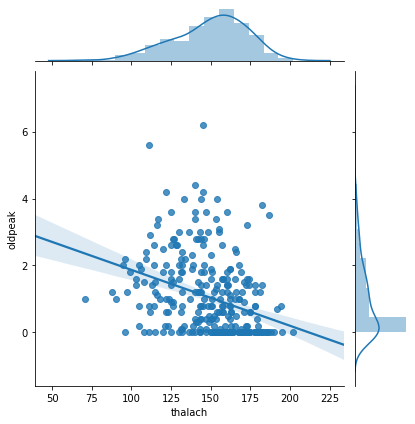

In [20]:
sns.jointplot('thalach', 'oldpeak', df, kind="reg")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: No contour levels were found within the data range.
  app.launch_new_instance()


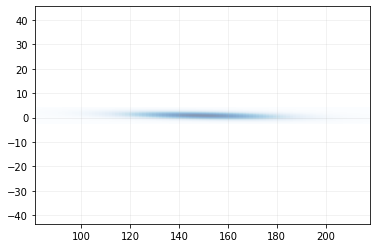

In [21]:
c1 ='thalach'
c2 ='oldpeak'
c1_mean = df[c1].mean()
c2_mean = df[c2].mean()

means = [c1_mean, c2_mean]
cov = df[[c1,c2]].cov()
plot_2d_Gaussian_pdf(means, cov.as_matrix())

In [22]:
df[df['sex'] ==1][NUMERICAL_FEATURES].corr()


,age,trestbps,chol,thalach,slope,oldpeak,ca
age,1.000000,0.242757,0.168294,-0.412328,-0.221357,0.228718,0.249554
trestbps,0.242757,1.000000,0.076418,-0.008675,-0.052554,0.105987,0.005446
chol,0.168294,0.076418,1.000000,-0.048656,-0.101405,0.052582,0.097317
thalach,-0.412328,-0.008675,-0.048656,1.000000,0.402640,-0.363006,-0.216261
slope,-0.221357,-0.052554,-0.101405,0.402640,1.000000,-0.563718,-0.028561
oldpeak,0.228718,0.105987,0.052582,-0.363006,-0.563718,1.000000,0.124280
ca,0.249554,0.005446,0.097317,-0.216261,-0.028561,0.124280,1.000000


In [23]:
df[df['sex'] ==0][NUMERICAL_FEATURES].corr()


,age,trestbps,chol,thalach,slope,oldpeak,ca
age,1.000000,0.268502,0.240547,-0.399214,-0.051652,0.230982,0.395040
trestbps,0.268502,1.000000,0.129123,-0.093803,-0.269270,0.389482,0.254851
chol,0.240547,0.129123,1.000000,0.010119,0.128222,0.114090,0.080386
thalach,-0.399214,-0.093803,0.010119,1.000000,0.318193,-0.247712,-0.146251
slope,-0.051652,-0.269270,0.128222,0.318193,1.000000,-0.599033,-0.199656
oldpeak,0.230982,0.389482,0.114090,-0.247712,-0.599033,1.000000,0.453663
ca,0.395040,0.254851,0.080386,-0.146251,-0.199656,0.453663,1.000000


### There are features that are significantly correlated in felame but not in male.
### for exmaple ca and trestbps, ca and oldpeak

In [24]:
df[df['target'] ==0][NUMERICAL_FEATURES].corr()

,age,trestbps,chol,thalach,slope,oldpeak,ca
age,1.000000,0.229051,0.131000,-0.134374,-0.087786,0.103145,0.320238
trestbps,0.229051,1.000000,0.137042,0.008827,-0.152855,0.131073,0.047370
chol,0.131000,0.137042,1.000000,0.023964,0.002853,0.001750,0.118689
thalach,-0.134374,0.008827,0.023964,1.000000,0.343244,-0.188866,-0.061411
slope,-0.087786,-0.152855,0.002853,0.343244,1.000000,-0.559223,0.014539
oldpeak,0.103145,0.131073,0.001750,-0.188866,-0.559223,1.000000,0.149476
ca,0.320238,0.047370,0.118689,-0.061411,0.014539,0.149476,1.000000


In [25]:
df[df['target'] ==1][NUMERICAL_FEATURES].corr()

,age,trestbps,chol,thalach,slope,oldpeak,ca
age,1.000000,0.240104,0.237966,-0.527542,-0.107877,0.194157,0.109606
trestbps,0.240104,1.000000,0.076147,0.041142,-0.015517,0.180677,0.024574
chol,0.237966,0.076147,1.000000,0.015728,0.040549,0.064449,-0.035067
thalach,-0.527542,0.041142,0.015728,1.000000,0.219496,-0.183805,-0.041410
slope,-0.107877,-0.015517,0.040549,0.219496,1.000000,-0.471792,0.113300
oldpeak,0.194157,0.180677,0.064449,-0.183805,-0.471792,1.000000,-0.078685
ca,0.109606,0.024574,-0.035067,-0.041410,0.113300,-0.078685,1.000000


# correlation by target
### for non healthy - age and thalach
### for healthy - ca and age, ca and chol 

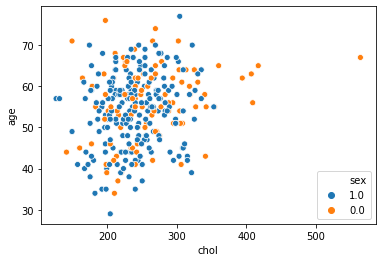

In [26]:
sns.scatterplot(data=df, x="chol", y="age", hue='sex')

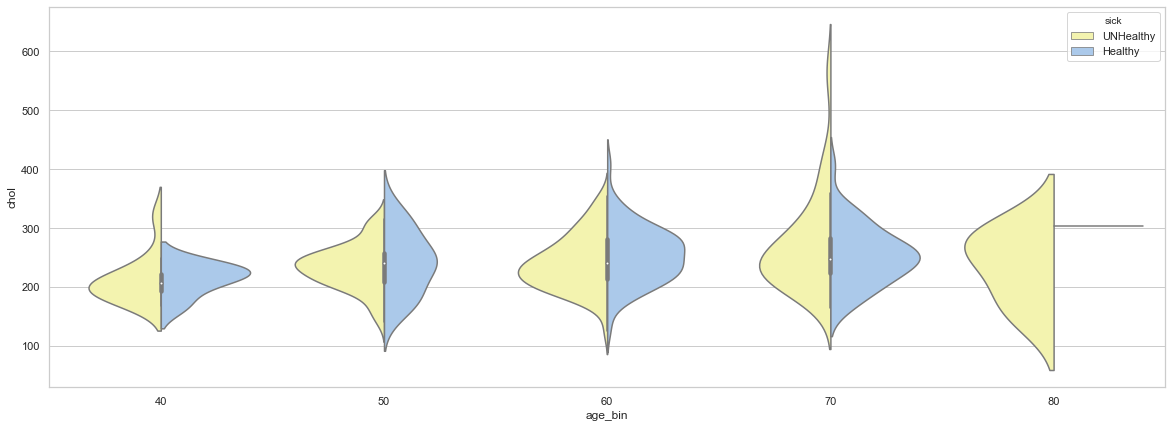

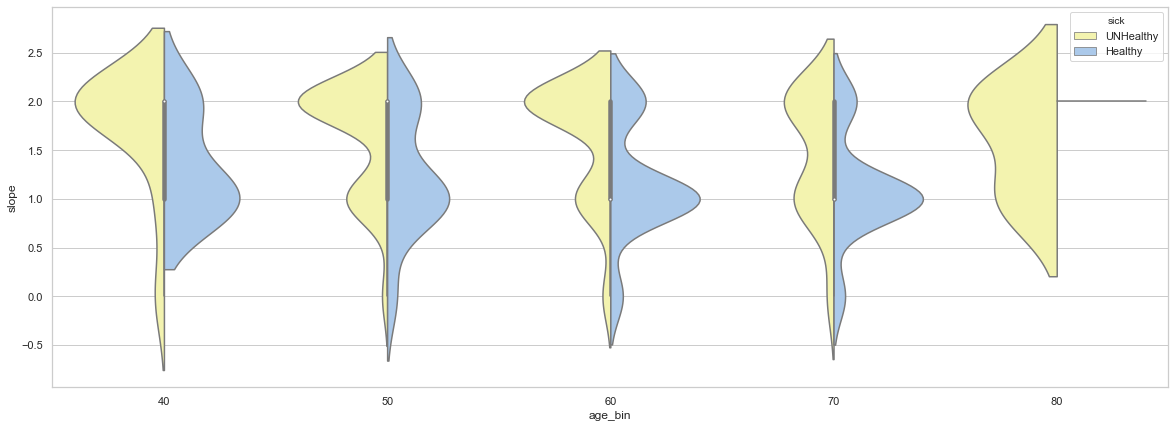

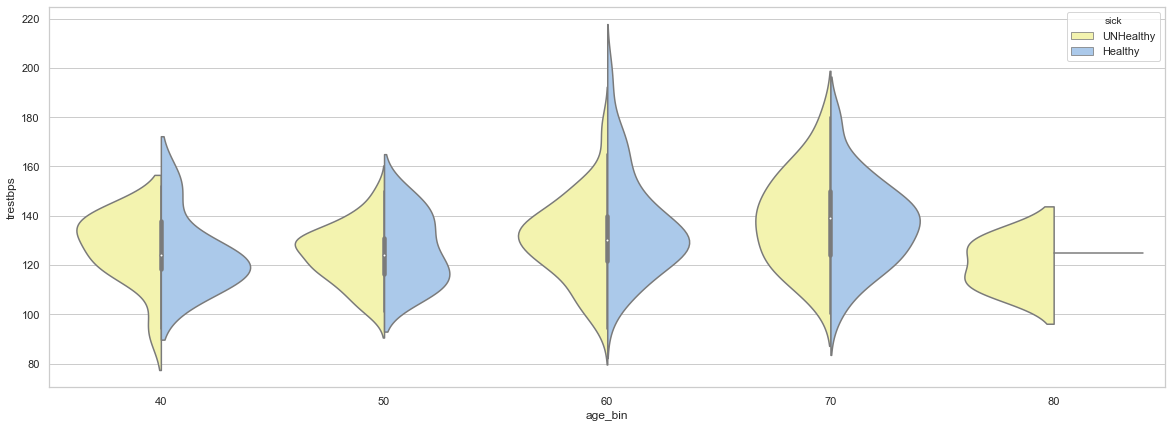

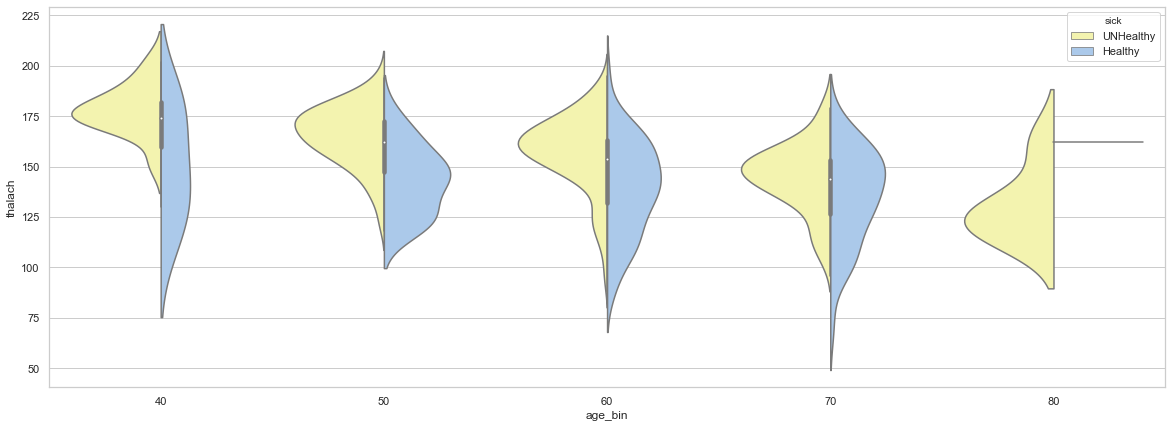

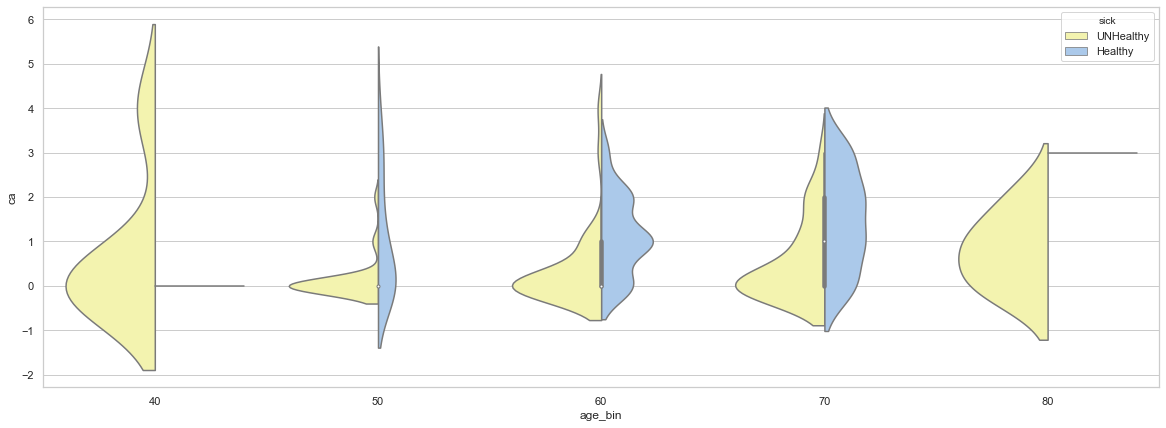

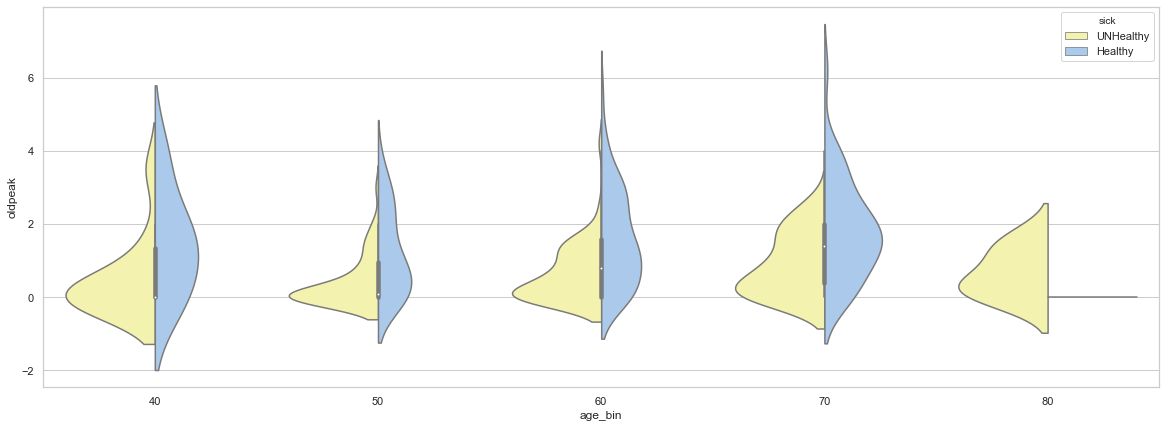

In [27]:

def set_age_bin(age):
    if age <= 40:
        return 40
    elif age <= 50:
        return 50
    elif age <= 60:
        return 60
    elif age <= 70:
        return 70
    elif age <= 80:
        return 80
    else:
        return 90
    

def plt_violins():
    
    age_df = df.copy()
    age_df['age_bin'] = age_df['age'].apply(set_age_bin)
    age_df['sick'] = age_df['target'].apply(lambda x: 'UNHealthy' if x == 1 else 'Healthy')
    
   
    for col in set(NUMERICAL_FEATURES) - set(['age']):
        plt.figure(figsize=(20,7))
        sns.set(style="whitegrid", palette="pastel", color_codes=True)
        sns.violinplot(x='age_bin', y=col, hue='sick', split=True,
                       palette={"UNHealthy": "y", "Healthy": "b"},
                       data=age_df)
        plt.show()
plt_violins()

### Question 3 - Heavy Tailed distributions (10 points)

Recall the definition of Heavy Tailed distribtion from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

#### 3.A
Does the standard normal distribution have a heavy right tail? prove your answer.

#### Normal distribution is not heavy right tail distribution.<br><br>

Heavy tail definition:

$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$
$$=\lim_{x\to\infty} e^{tx}\cdot\int_{x}^{\inf} \frac {1}{\sqrt{2\pi}} \cdot e^{-\frac{u^2}{2}}du $$
$$=\lim_{x\to\infty} e^{tx}\cdot (\frac{1}{2}-\frac{1}{2}\text{erf}\left(\frac{x}{\sqrt{2}}\right)) *= 0 $$
<br>

<br>
(*) From L'Hopitals rule, where I know that $ \lim_{x\to\infty}(\frac{1}{2}-\frac{1}{2}\text{erf}\left(\frac{x}{\sqrt{2}}\right)) = 0$

So there is  t > 0  such that $$\lim_{x\to\infty} e^{tx}P(X>x)\neq \infty $$

<br><br>

#### 3.B
Does the standard log-normal distribution have a heavy right tail? prove your answer.

#### log noraml is right tail distribution.


$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

$$=\lim_{x\to\infty} e^{tx}\cdot\int_{x}^{\inf} \frac {1}{\sqrt{2\pi}} \cdot e^{-\frac{ln(u)^2}{2}} \cdot \frac{1}{u}du $$
$$=\lim_{x\to\infty} e^{tx}\cdot \frac{1}{\sqrt{2}\sqrt{\pi }x} $$
$$=\frac{1}{\sqrt{2}\sqrt{\pi }}\cdot \lim _{x\to \infty \:}\left(\frac{e^{xt}}{x}\right)$$
$$(*) =\frac{1}{\sqrt{2}\sqrt{\pi }}\cdot \lim _{x\to \infty \:}\left(\frac{e^{xt}t}{1}\right) = \infty$$
<br>
(*) from L'Hopitals rule I know that $ \lim _{x\to \infty \:}\left(\frac{e^{xt}}{x}\right) = \lim _{x\to \infty \:}\left(\frac{e^{xt}t}{1}\right)$
<br><br>
So for every t > 0 $$\lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
After i rolls are determined the $i+1^{st}, X_{i+1},$ is drawn according to the row that corresponds to the value of $X_i$ in the matrix $T$ below. <br>
In other words, $T$ is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

In [165]:


T = np.array([[0.5, 0.2, 0.05, 0, 0.05, 0.2],
              [0.2, 0.5, 0.2, 0.05, 0, 0.05],
              [0.05, 0.2, 0.5, 0.2, 0.05, 0],
              [0, 0.05, 0.2, 0.5, 0.2, 0.05],
              [0.05, 0, 0.05, 0.2, 0.5, 0.2],
              [0.2, 0.05, 0, 0.05, 0.2, 0.5]])

initial_prob = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
values = [1,2,3,4,5,6]


initial_rm = stats.rv_discrete(name="initial", values=(values, initial_prob))
val_to_rm = {i:  stats.rv_discrete(name="transition {}".format(i), values=(values, T[i-1])) for i in range(1,7)}

def trajectory(length):
    values = []
    current_state = initial_rm.rvs(size=1)[0]

    values.append(current_state)
    
    for _ in range(length-1):
        current_state = val_to_rm[current_state].rvs(size=1)[0]
        values.append(current_state)
    
    return values



#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [166]:


def q4(trajectory_length, num_of_trajectories, num_of_bins):
    averages = [np.mean(trajectory(trajectory_length)) for _ in range(num_of_trajectories)]


    _ = plt.hist(averages, bins=num_of_bins) 
    plt.title("Histogram of {} trajectories of length length {}".format(num_of_trajectories, trajectory_length))
    

    plt.show()
    (mu, sigma) = norm.fit(averages)
    print("Empirical Mean = {} Empirical STD = {}".format(mu, sigma))
    return averages, mu, sigma


#4.a.1
#### I expected the average value to be 3.5, since eventually we have uniform distribution over 1,2,3,4,5,6
so $(1+2+3+4+5+6)/6 = 3.5$

#4.a.2

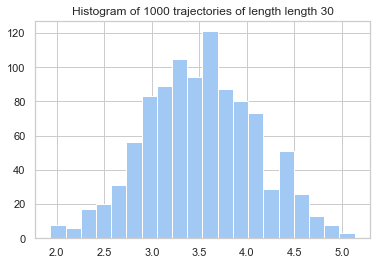

Empirical Mean = 3.5133333333333336 Empirical STD = 0.5795726394891709
The distribution looks Normal


In [167]:
num_of_trajectories = 1000
trajectory_length = 30 
num_of_bins = 20

averages1, mu1, sigma1 = q4(trajectory_length, num_of_trajectories, num_of_bins)
print('The distribution looks Normal')

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

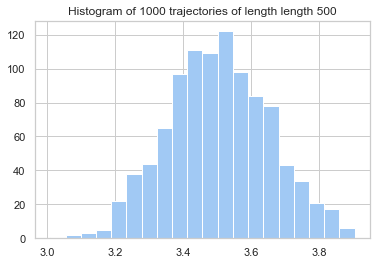

Empirical Mean = 3.503844 Empirical STD = 0.14944898682828195


In [168]:
num_of_trajectories = 1000
trajectory_length = 500 
num_of_bins = 20

averages2, mu2, sigma2 = q4(trajectory_length, num_of_trajectories, num_of_bins)


#### 4.C
Draw normal fit curves on your two histograms.

In [169]:
def q4c(averages, mu, sigma, num_of_bins):
    ax = sns.distplot(averages, bins=num_of_bins)
    ax.set(xlabel='bins', ylabel='Frequency')
    plt.show()

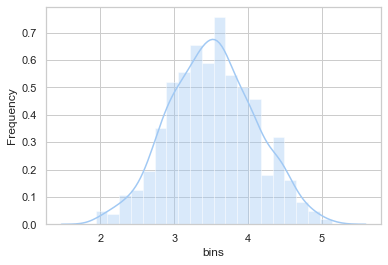

In [170]:
q4c(averages1, mu1, sigma1, num_of_bins)

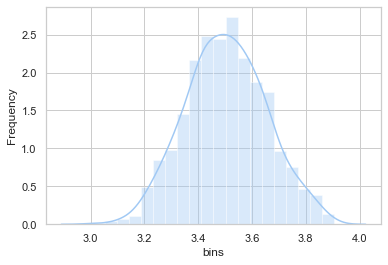

In [171]:
q4c(averages2, mu2, sigma2, num_of_bins)

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

In [173]:
def hm_cov(T, initial_prob, values, t):
    
    T = np.linalg.matrix_power(T, t)
    
    joint_expected = 0.0
    x_ecpected = 0.0 
    y_expected = 0.0 
    for index1, val1 in enumerate(values):
        prob1 = initial_prob[index1]
        x_ecpected += prob1 * val1
        for  index2, val2 in enumerate(values):
            prob2 = T[index1][index2]
            
            joint_expected += val1 * val2 * prob1 * prob2
            y_expected += val2 * prob1 * prob2
    
    return joint_expected - x_ecpected - y_expected

hm_cov(T, initial_prob, values, 500)

5.250000000000169

#### 4.E - Bonus
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that 
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

### Question 5 - Sampling of Kendall correlation (15 points)

Recall that the Naive time complexity of computing Kendall correlation is $O(n^2)$. We will investigate a sampling approach to approximate Kendall correlations efficiently. 

#### 5.A
Draw a sample of 10M samples from a bivariate distribution $(X,Y)\sim \mathcal{N}(\bf{0},S)$ with the covariance matrix $S=\begin{pmatrix} 2 & 3\\ 3 & 5 \end{pmatrix}$. <br>
Calculate the Kendall correlation $\tau(X,Y)$.
How long did this calculation take?

In [183]:
def sample_points(num_of_samples, mean, cov):
    x, y = np.random.multivariate_normal(mean, cov, num_of_samples ).T
    return x,y

In [184]:

mean = [0, 0]
cov = [[2, 3], [3, 5]]


x, y = sample_points(10000000, mean, cov)

x.shape, y.shape

((10000000,), (10000000,))

In [185]:
%%time
tem_m_kendall_val = stats.kendalltau(x, y)[0]
tem_m_kendall_val

CPU times: user 6.07 s, sys: 299 ms, total: 6.37 s
Wall time: 8.04 s


0.795338090604729

#### 5.B
Sample 1,000 points from the data and calculate the Kendall correlation $\tau(U,V)$. 

In [43]:
x, y = sample_points(1000, mean, cov)

In [44]:
%%time
stats.kendalltau(x, y)[0]

CPU times: user 1.3 ms, sys: 1.46 ms, total: 2.76 ms
Wall time: 2.23 ms


0.8017297297297298

#### 5.C
Repeat Section 5.B 1000 times and plot a histogram of the calculated $\tau(U,V)$ values. Indicate the true $\tau(X,Y)$ (calculated on the entire 10M samples) on the histogram. What are the empirical mean and stadard deviation of the calculated $\tau(U,V)$ values?

Empirical Mean = 0.7950325765765767 STD = 0.006806745737232966


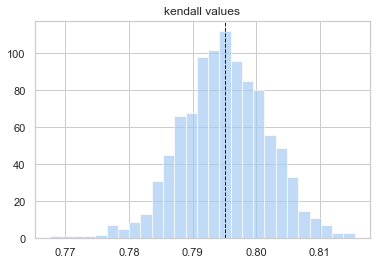

In [45]:
kendall_values = [stats.kendalltau(*sample_points(1000, mean, cov))[0] for _ in range(1000)]

(mu, sigma) = norm.fit(kendall_values)
print("Empirical Mean = {} STD = {}".format(mu, sigma))

_ = plt.hist(kendall_values, bins='auto', alpha=0.65)  # arguments are passed to np.histogram
plt.title("kendall values")
plt.axvline(tem_m_kendall_val, color='k', linestyle='dashed', linewidth=1)

#### 5.D
Repeat Section 5.C for samples of $m={10, 50, 100, 500, 1000, 5000}$ points. <br>
What is the naive time complexity of each calculation? <br>
Compare the empirical time complexity and the standard deviation of the calucated values to the size of the sample.

$ Naive \ complexity \ is \ n^2 $

In [187]:
samples_sizes = [10,50,100,500,1000,5000]
size_time_values = []
all_values = []
sample_size_to_values = {}
for sample_size in samples_sizes:
    
    
    x, y = sample_points(sample_size, mean, cov)
    
    start = time.time()
    kendall_values = [stats.kendalltau(*sample_points(sample_size, mean, cov))[0] for _ in range(1000)]
    sample_size_to_values[sample_size] = kendall_values
    end = time.time()
    size_time_values.append((sample_size , end-start, kendall_values))
    all_values.extend(kendall_values)

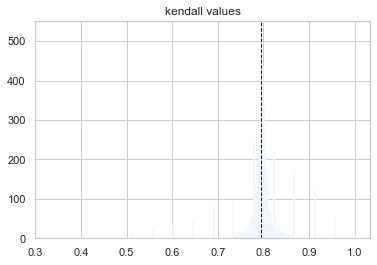

In [175]:
_ = plt.hist(all_values, bins='auto', alpha=0.65)  # arguments are passed to np.histogram
plt.title("kendall values")
plt.axvline(tem_m_kendall_val, color='k', linestyle='dashed', linewidth=1)

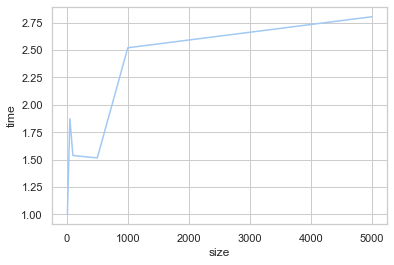

In [179]:

size_time_df = pd.DataFrame([(size, time) for (size, time, _) in size_time_values], columns=['size', "time"])
sns.lineplot(data=size_time_df, x="size", y="time")


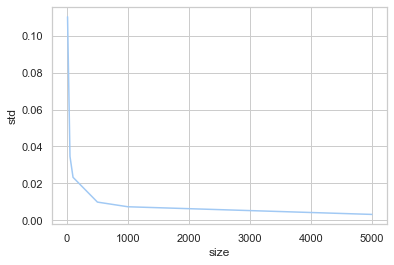

In [181]:
std_and_size = []
for size, time, values in size_time_values:
    size_std = np.std(values, axis=0)
    std_and_size.append((size, size_std))

size_std_df = pd.DataFrame(std_and_size, columns=['size', "std"])
sns.lineplot(data=size_std_df, x="size", y="std")

#### 5.E
A coleague found an old dataset which she believes originated from the same popuation as the data in Section 5.A. The dataset is avaialble as "Kendall_data.csv". 

Using Kendall correlation and your answer to Section 5.D, how much confidence do you have in rejecting your coleague's claim? Explain your answer and show your calculation.

In [159]:
df = pd.read_csv("Kendall_data.csv", header=None, names=['x','y'])

In [160]:
len(df)

100

In [162]:
sample_tau, _ = stats.kendalltau(df['x'].tolist(), df['y'].tolist())
sample_tau

0.7806556689451707

In [208]:
def mean_confidence_interval(data, confidence):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

confidence = 0.95

start, end = mean_confidence_interval(all_values, confidence)

print('for {} confidence the range is {} to {} while the new dataset mean is {}'.format(confidence, start, end, sample_tau))




for 0.95 confidence the range is 0.7928342022999852 to 0.7953919568958674 while the new dataset mean is 0.7806556689451707


#### We can see that the kendalltau value for the new dataset is not in the range of even 0.1 confidence, so 
##### I have low confidence that the datasets originated from the same population